**Import Dependencies**

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# importing the CSV file to DataFrame
dataset = pd.read_csv('Sales_data.csv')

**basic dataframe overview**

In [ ]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataset.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
dataset.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
dataset.duplicated().sum()

np.int64(0)

**Exploratory Data Analysis (EDA)**

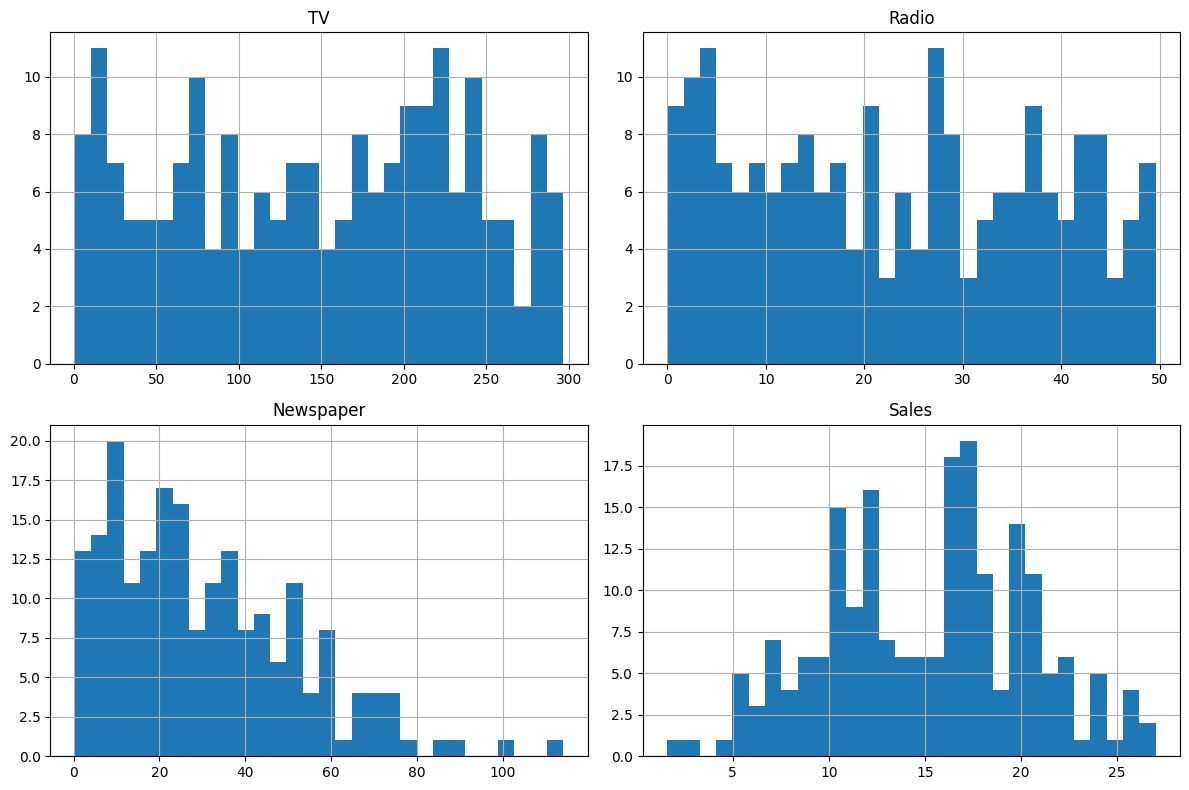

In [ ]:
# Histogram for distributions
dataset.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

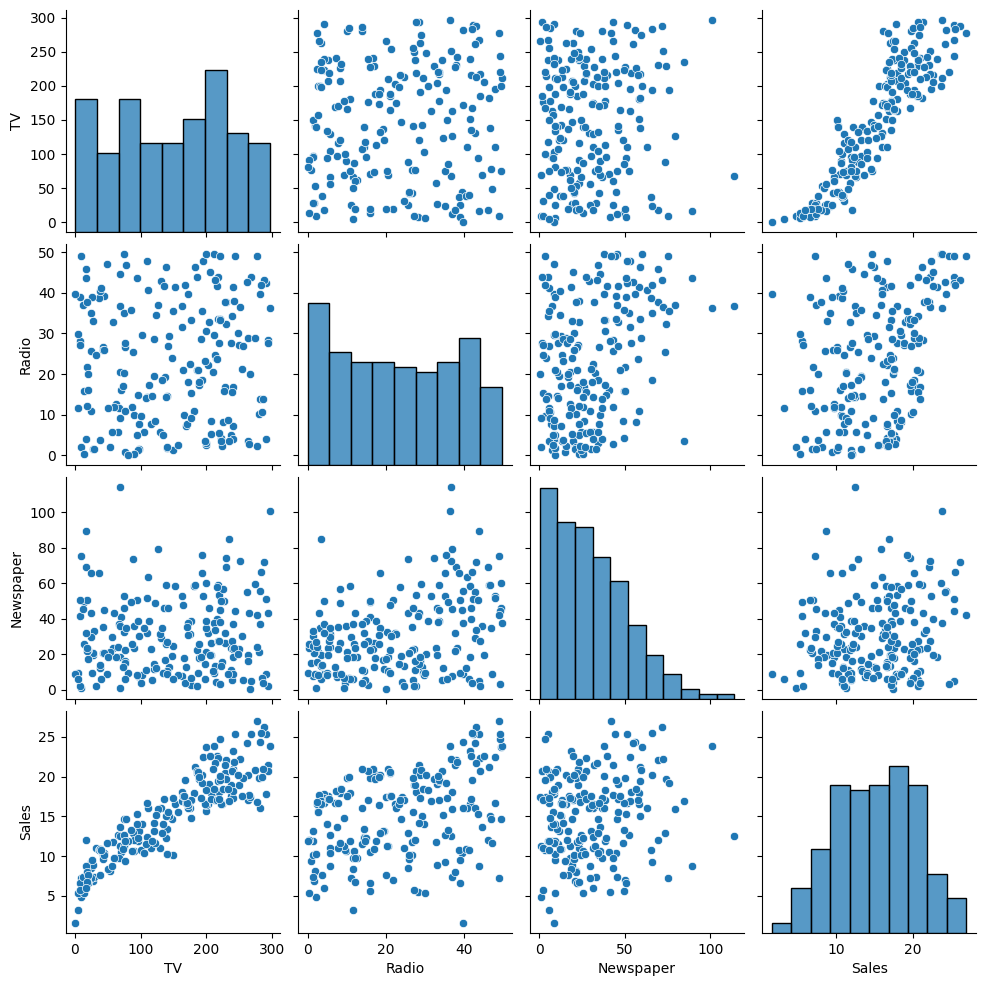

In [ ]:
# Pairplot to see pairwise relationships
sns.pairplot(dataset)
plt.show()

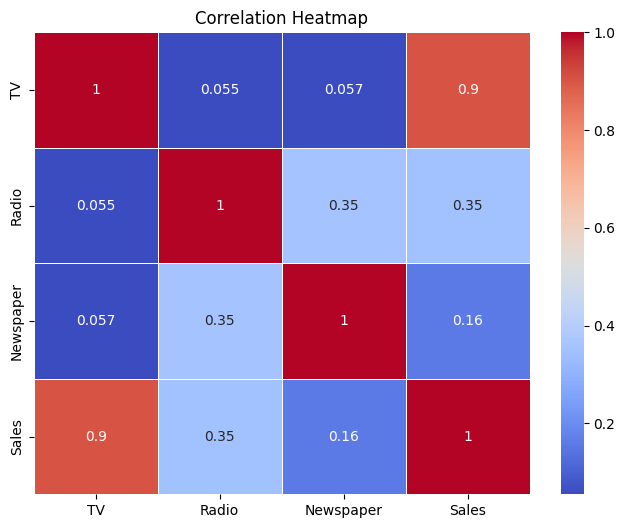

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

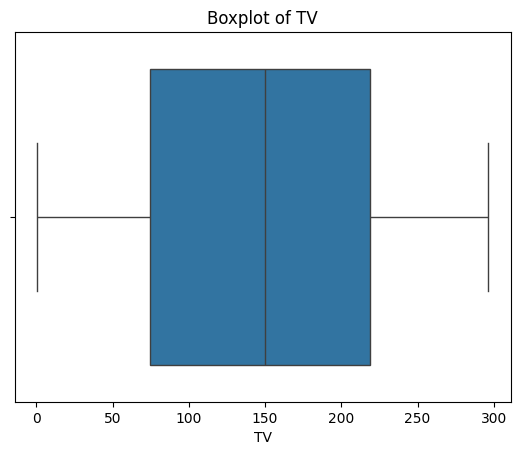

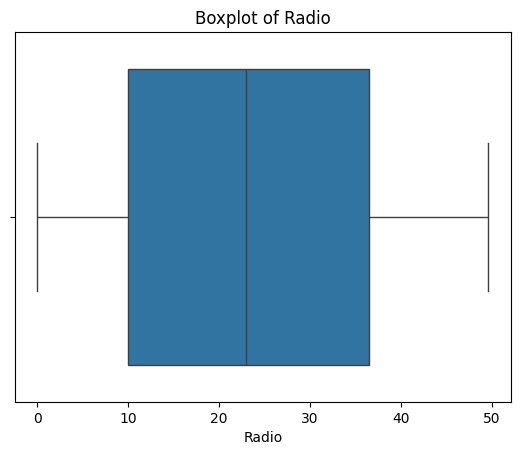

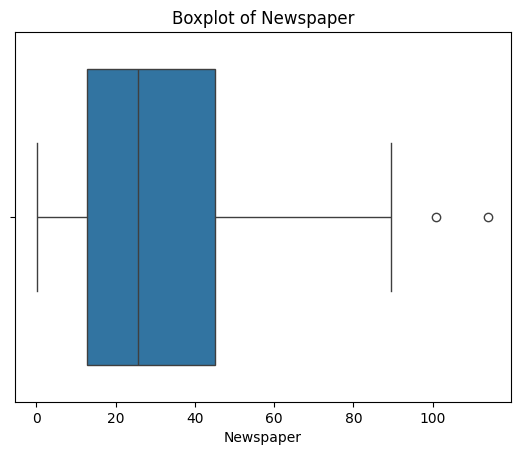

In [ ]:
# Boxplots to detect outliers
for col in dataset.columns[:-1]:  # Exclude target column
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

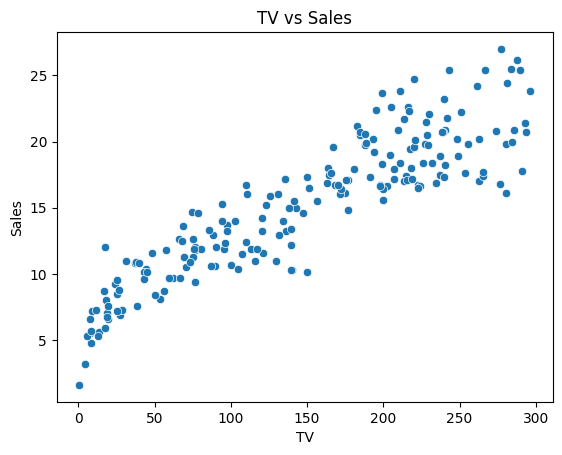

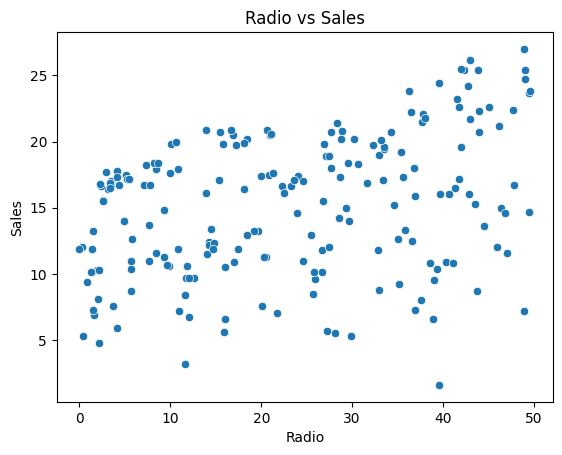

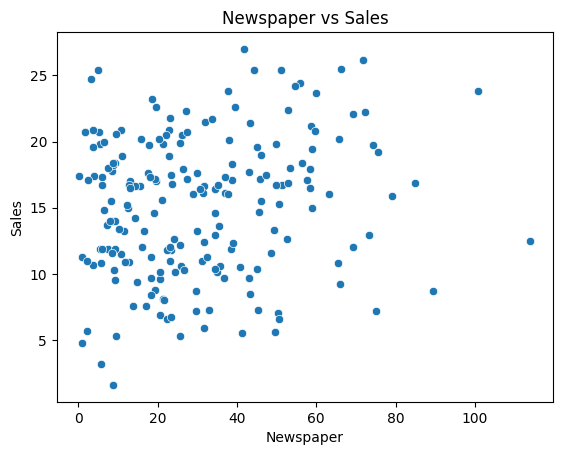

In [ ]:
# Scatter plots: Feature vs Sales
for col in dataset.columns:
    if col != 'Sales':
        sns.scatterplot(x=dataset[col], y=dataset['Sales'])
        plt.title(f'{col} vs Sales')
        plt.show()

In [ ]:
X = dataset.drop('Sales', axis=1)
y = dataset['Sales']


**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection & Training**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model Evaluation**

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

    # Residual plot
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual vs Predicted Sales")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()


MAE: 1.2748262109549338
MSE: 2.9077569102710896
RMSE: 1.7052146229349223
R² Score: 0.9059011844150826


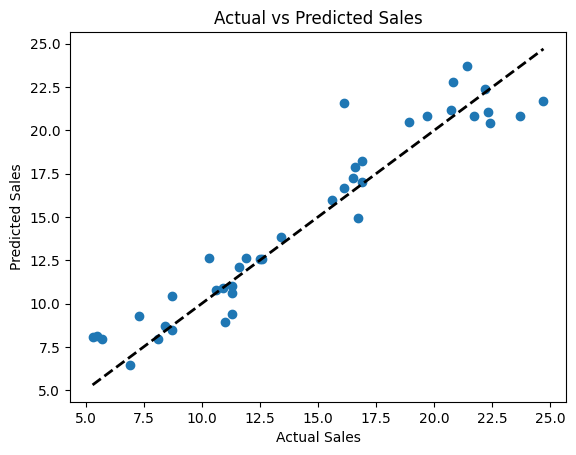

MAE: 0.9179999999999993
MSE: 1.4374328500000009
RMSE: 1.1989298770153327
R² Score: 0.9534827934927883


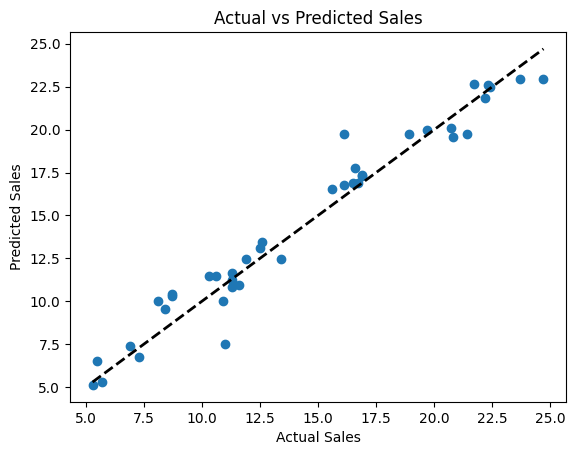

MAE: 0.8750820755958557
MSE: 1.3163463002119749
RMSE: 1.1473213587360669
R² Score: 0.9574013125677735


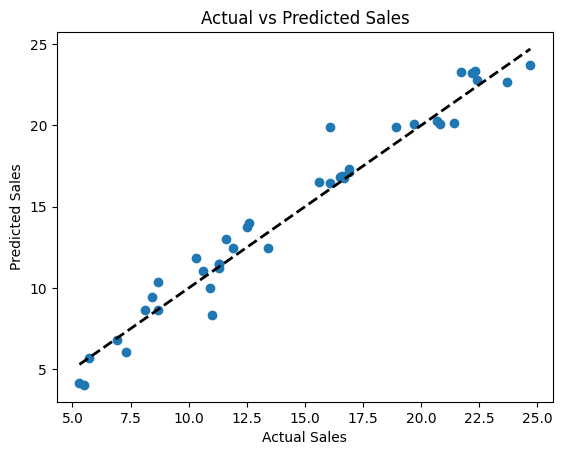

In [ ]:
evaluate_model(lr_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)
evaluate_model(xgb_model, X_test, y_test)

XGBRegressor performs the best across all major metrics:

Lowest Mean Absolute Error (MAE) → predictions are closer on average.

Lowest Root Mean Squared Error (RMSE) → better handling of large errors.

Highest R² Score (0.957) → explains ~95.7% of the variance in Sales.

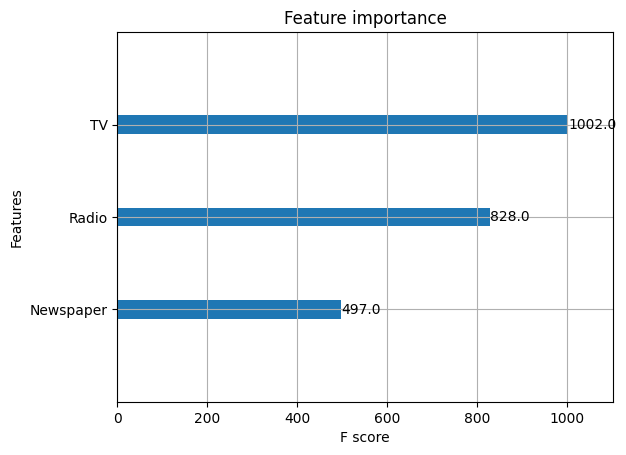

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

**CONCLUSION**


This project successfully applied machine learning techniques to predict sales using Python. Through data preprocessing, visualization, and model building, we identified key trends and built a reliable prediction model. The results highlight the power of data-driven decision-making in real-world business scenarios.

